### Creating and Customizing our first plots

In [2]:
from matplotlib import pyplot as plt

In [3]:
# Some random data to plot
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
dev_y = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]
py_dev_y = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]
js_dev_y = [37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583]

In [4]:
# Lists out the available plotting styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


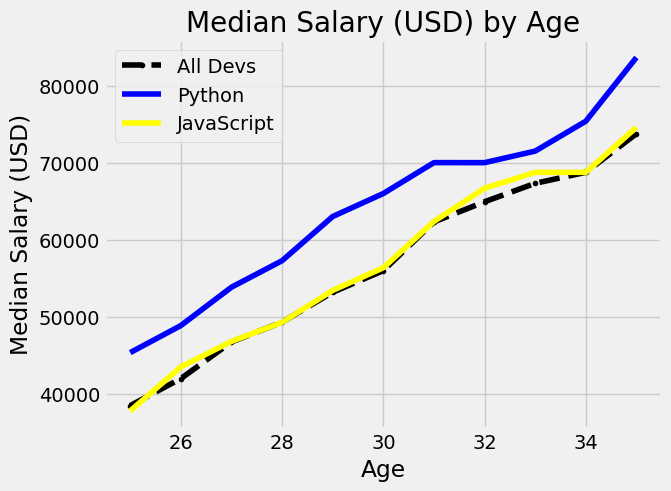

In [5]:
# Using style of my choice for the plot
plt.style.use('fivethirtyeight')

# Plotting y versus x as lines and/or markers. Plot method plots a line by default
plt.plot(ages_x, dev_y,
         color = 'k', linestyle = '--',
         marker = '.', label = 'All Devs') # Plot of ages_x vs dev_y

plt.plot(ages_x, py_dev_y,
         color = 'b',
         label = 'Python') # Plot of ages_x vs py_dev_y # Plot of ages_x vs js_dev_y

plt.plot(ages_x, js_dev_y,
         color = 'yellow',
         label = 'JavaScript')

# Giving X and Y labels to our graph
plt.xlabel("Age")
plt.ylabel("Median Salary (USD)")

# Giving title to our plot
plt.title("Median Salary (USD) by Age")

# Giving legend to our plot
plt.legend()

# Showing grid in the plot
plt.grid(True)

# Save the plot as an image file in the current directory
plt.savefig('plot.png')

### Bar Charts and Analyzing Data from CSVs

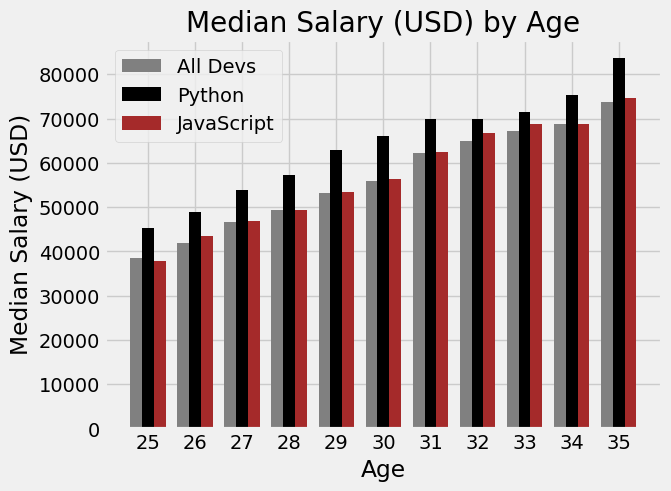

In [6]:
import numpy as np
import pandas as pd
import csv
from collections import Counter

x_indexes = np.arange(len(ages_x)) # To prevent the overlapping of the bar
width = 0.25 # Setting the width of each bar

# Plotting a bar graph for the given data
plt.bar(x_indexes - width, dev_y,
        width = width,
        color = 'gray', label = 'All Devs')

plt.bar(x_indexes, py_dev_y,
        width = width,
        color = 'black', label = 'Python')

plt.bar(x_indexes + width, js_dev_y,
        width = width,
        color = 'brown', label = 'JavaScript')

# Adding X and Y labels in the plot
plt.xlabel("Age")
plt.ylabel("Median Salary (USD)")

# Adding labels for eaxh ticks in the X-axis
plt.xticks(ticks = x_indexes, labels = ages_x)

# Adding title to the plot
plt.title("Median Salary (USD) by Age")

# Adding legend to the plot
plt.legend()

Text(0.5, 1.0, 'Most popular programming languages')

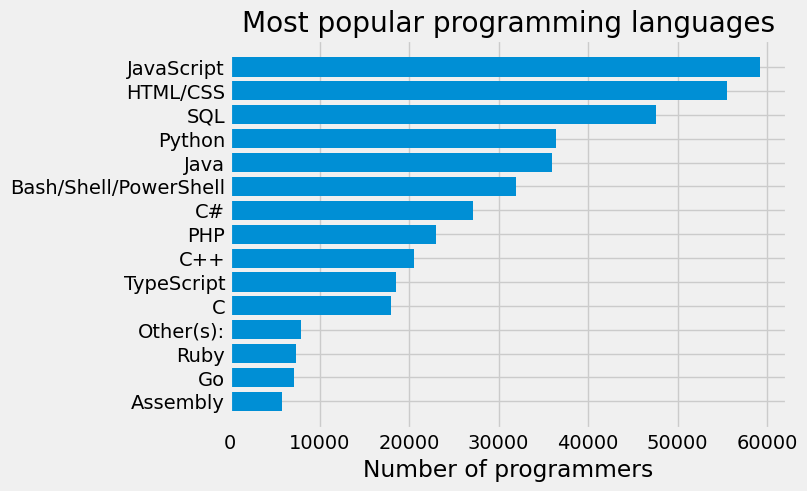

In [7]:
# Reading csv file
with open('data.csv') as csv_file:
  csv_reader = csv.DictReader(csv_file)

  language_counter = Counter() # To count the popular programming languages

  for row in csv_reader:
    language_counter.update(row['LanguagesWorkedWith'].split(';'))

languages = []
popularity = []

for item in language_counter.most_common(15):
  languages.append(item[0])
  popularity.append(item[1])

# To get the most popular data at top
languages.reverse()
popularity.reverse()

# Plotting a horizontal bar graph for the above data
plt.barh(languages, popularity)

# Giving X and Y labels for the plot
plt.xlabel("Number of programmers")

# Adding title to the plot
plt.title("Most popular programming languages")

Text(0.5, 1.0, 'Most popular programming languages')

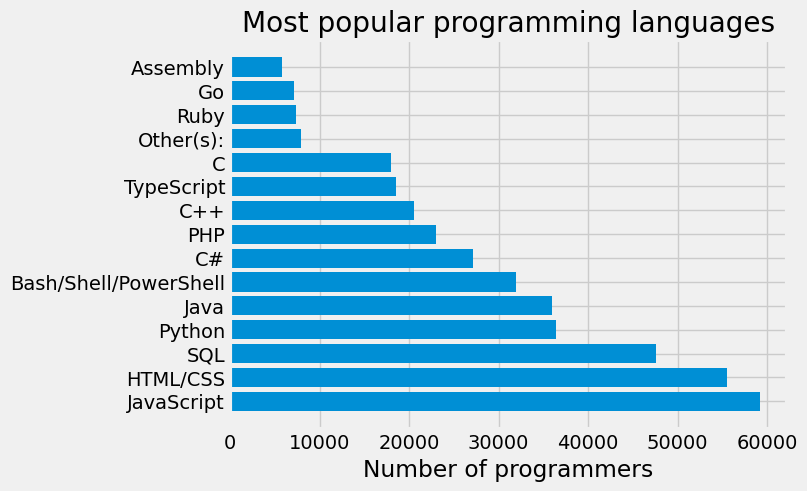

In [8]:
# Repeating the above step using pandas to read csv
data = pd.read_csv("data.csv")
ids = data['Responder_id']
lang_responses = data['LanguagesWorkedWith']

language_counter = Counter()

for response in lang_responses:
  language_counter.update(response.split(';'))

languages = []
popularity = []

for item in language_counter.most_common(15):
  languages.append(item[0])
  popularity.append(item[1])

# Plotting a horizontal bar graph for the above data
plt.barh(languages, popularity)

# Giving X and Y labels for the plot
plt.xlabel("Number of programmers")

# Adding title to the plot
plt.title("Most popular programming languages")

### Pie Charts

Text(0.5, 1.0, 'Pie Chart')

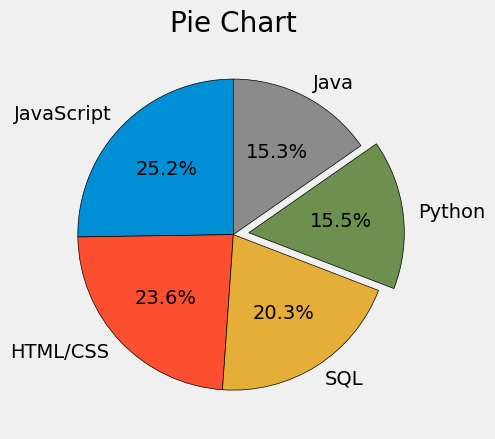

In [9]:
# it is better to use pie chart with less than 5 items
plt.style.use('fivethirtyeight')

slices = [59219, 55466, 47544, 36443, 35917]
labels = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']
explode = [0, 0, 0, 0.1, 0] # This explodes python slice 10% out of the radius

plt.pie(slices, labels = labels,
        wedgeprops = {'edgecolor' : "black"},
        explode = explode,
        startangle = 90, autopct = '%1.1f%%') # This can be explored in the documentation

plt.title("Pie Chart")

### Stack Plots

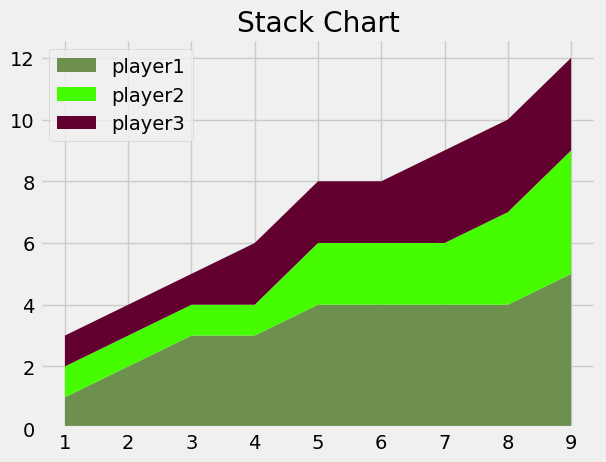

In [10]:
plt.style.use("fivethirtyeight")

minutes = [1, 2, 3, 4, 5, 6, 7, 8, 9]

player1 = [1, 2, 3, 3, 4, 4, 4, 4, 5]
player2 = [1, 1, 1, 1, 2, 2, 2, 3, 4]
player3 = [1, 1, 1, 2, 2, 2, 3, 3, 3]

labels = ['player1', 'player2', 'player3'] # For the legend
colors = ['#6d904f', '#45fd00', '#62002f']

plt.stackplot(minutes, player1, player2, player3, labels = labels, colors = colors) # Explore in documentation
plt.title("Stack Chart")
plt.legend(loc = "upper left") # For the location of the legend, we can also give a tuple as loc

### Filling Area on Line Plots

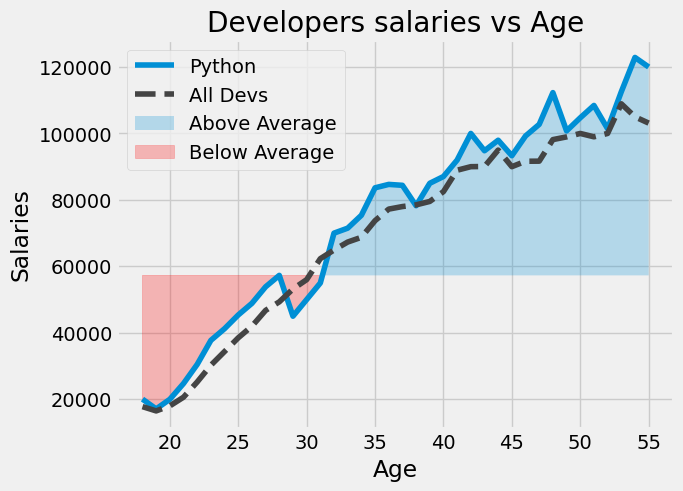

In [11]:
# Import csv file
data = pd.read_csv("newdata.csv")

age = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

# Plotting a line plot
plt.plot(age, py_salaries,
         label = "Python")

plt.plot(age, dev_salaries,
         linestyle = '--', color = '#444444',
         label = "All Devs")

overall_median = 57287

# Filling between the lines in the plot
plt.fill_between(age, py_salaries, overall_median,
                 where = (py_salaries > overall_median),
                 interpolate = True,
                 alpha = 0.25, label = "Above Average")

plt.fill_between(age, py_salaries, overall_median,
                 where = (py_salaries < overall_median),
                 interpolate = True, color = "red",
                 alpha = 0.25, label = "Below Average")

# Giving X and Y labels
plt.xlabel("Age")
plt.ylabel("Salaries")

# Giving title to the plot
plt.title("Developers salaries vs Age")

plt.legend()


### Histograms

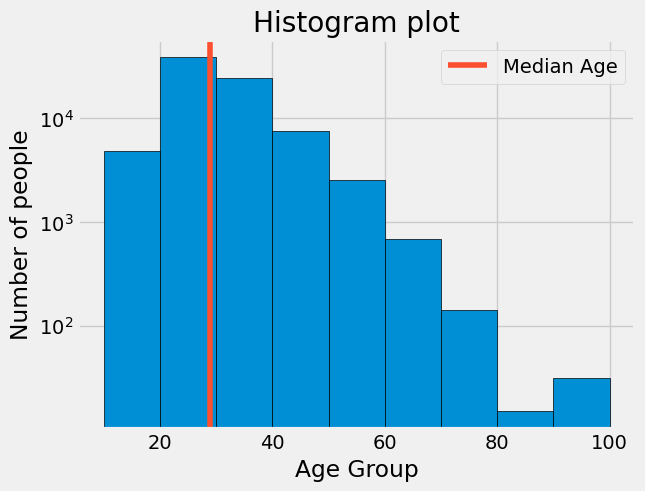

In [12]:
# Importing data
data = pd.read_csv("age.csv")

age = data['Age']
ids = data['Responder_id']

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.hist(age, bins = bins, edgecolor = 'black', log = True)

median_age = 29
color = '#fc4f30'

plt.axvline(median_age, color = color, label = 'Median Age')

# Giving title to the plot
plt.title("Histogram plot")

# Adding lables to the plot
plt.xlabel("Age Group")
plt.ylabel("Number of people")

# Adding legend to the plot
plt.legend()

### Scatter Plots

Text(0.5, 1.0, 'Scatter plot of likes vs views')

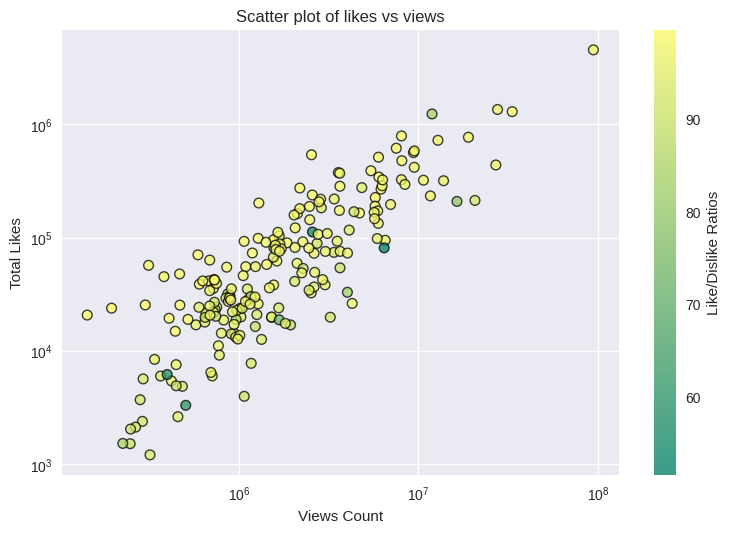

In [23]:
# Using seabor style for the plot
plt.style.use('seaborn-v0_8')

# Importing youtube likes and views csv data
data = pd.read_csv("2019-05-31-data.csv")

# Getting the view count, likes and ratio
view = data["view_count"]
likes = data["likes"]
ratio = data['ratio'] # we will later use ratio for the coloring of the scattered points

# Plotting a scatter plot
plt.scatter(view, likes,
            c = ratio, cmap = 'summer',
            edgecolor = 'black',
            linewidth = 1, alpha = 0.75)

# Showing colorbar in the plot
cbar = plt.colorbar()
cbar.set_label("Like/Dislike Ratios") # Giving label to the colorbar

# Setting the scale of the axes
plt.xscale('log')
plt.yscale('log')

# Giving labels to the plot
plt.xlabel("Views Count")
plt.ylabel("Total Likes")

# Giving title to the plot
plt.title("Scatter plot of likes vs views")


### Plotting time series data

Text(0, 0.5, 'Closing Price')

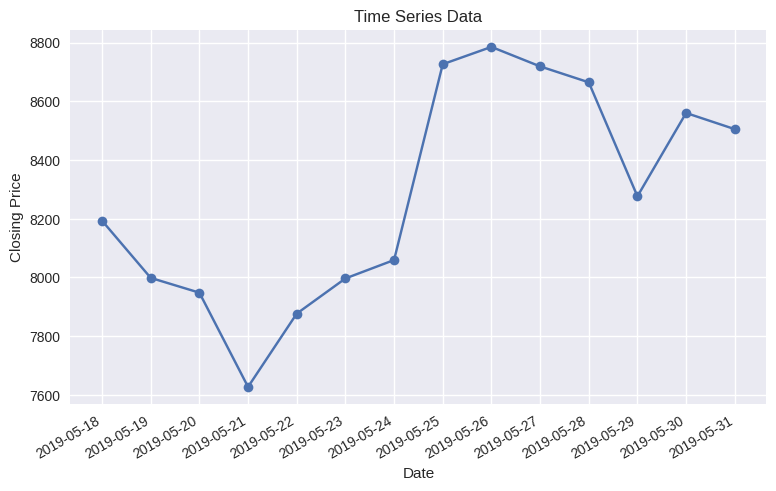

In [31]:
from matplotlib import dates as mpl_dates

# Using seabor style for the plot
plt.style.use('seaborn-v0_8')

# Importing csv file
data = pd.read_csv("timeseries_data.csv")

# Getting specific columns from the csv data
price_date = data["Date"]
price_close = data["Close"]

# Plotting the time series data
plt.plot_date(price_date, price_close, linestyle = 'solid')

# Preventing the overlapping of dates in the x-axis
plt.gcf().autofmt_xdate()

# Giving title to the plot
plt.title("Time Series Data")

# Giving labels to the graph
plt.xlabel("Date")
plt.ylabel("Closing Price")

### Plotting Live Data in Real-Time

In [37]:
# Writing data continuously to the csv file

import csv
import random
import time

x_value = 0
total_1 = 1000
total_2 = 1000

fieldnames = ["x_value", "total_1", "total_2"]

with open('real_data.csv', 'w') as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

while True:

    with open('real_data.csv', 'a') as csv_file:
        csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        info = {
            "x_value": x_value,
            "total_1": total_1,
            "total_2": total_2
        }

        csv_writer.writerow(info)
        print(x_value, total_1, total_2)

        x_value += 1
        total_1 = total_1 + random.randint(-6, 8)
        total_2 = total_2 + random.randint(-5, 6)

    time.sleep(1)

0 1000 1000
1 994 999
2 988 1003
3 994 1006
4 998 1001
5 1005 1005
6 1013 1009
7 1016 1012


KeyboardInterrupt: 

<ipython-input-36-6ee421f45910>:25: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(plt.gcf(), animate, interval = 1000)


Text(0.5, 1.0, 'Real time data')

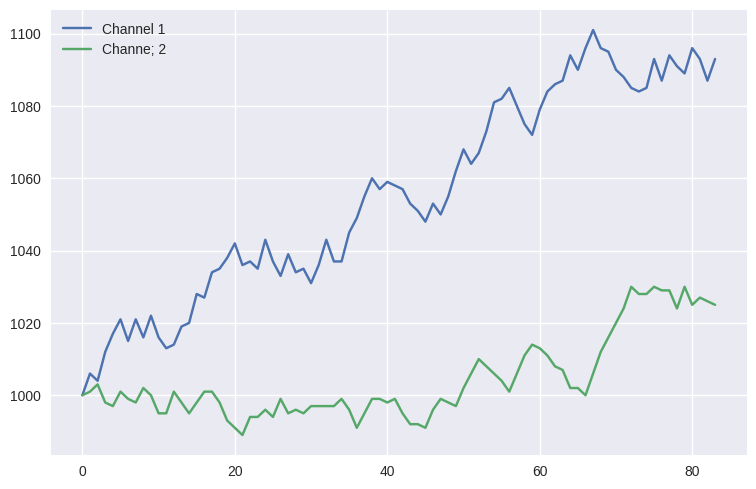

In [36]:
# Importing necessary library
from matplotlib.animation import FuncAnimation
from itertools import count

x_vals = []
y_vals = []

index = count()

# Importing real time data
def animate(i):
  data = pd.read_csv("real_data.csv")
  x = data['x_value']
  y1 = data['total_1']
  y2 = data['total_2']

  plt.cla()

  # Plotting channels y1 and y2
  plt.plot(x, y1, label = "Channel 1")
  plt.plot(x, y2, label = "Channe; 2")

  plt.legend(loc = "upper left")

ani = FuncAnimation(plt.gcf(), animate, interval = 1000)

# Giving title to the plot
plt.title("Real time data")



### Subplots

Text(0, 0.5, 'Median Salary(USD)')

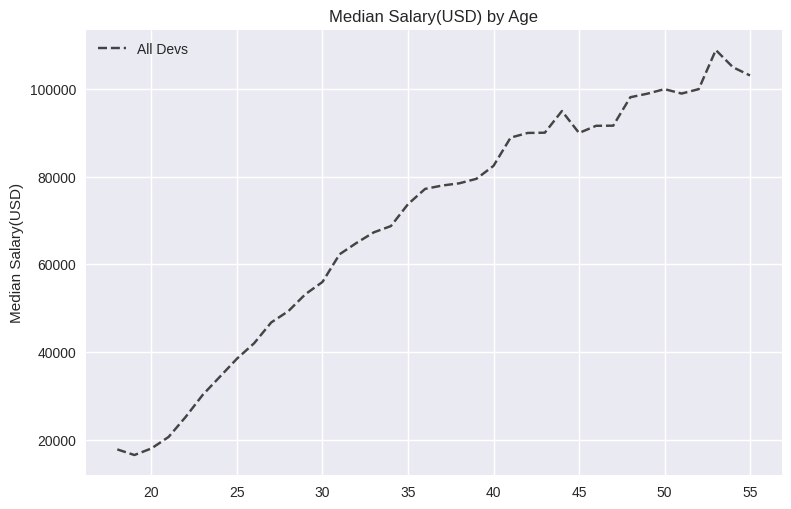

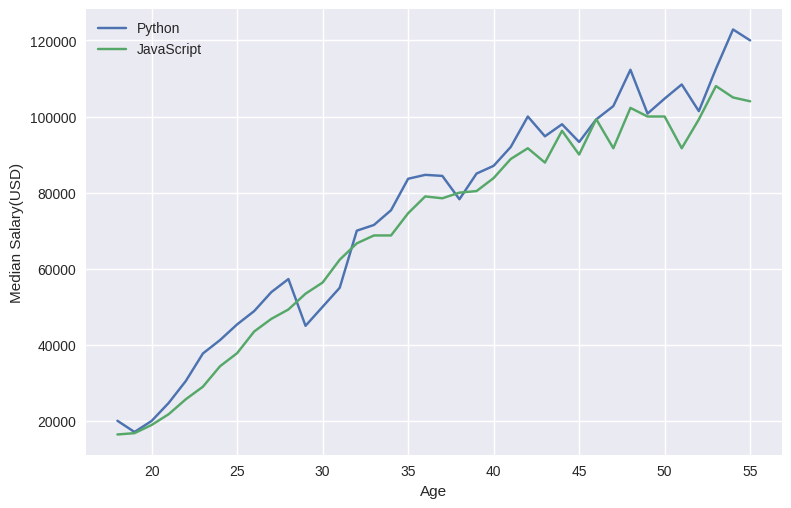

In [45]:
# Importing data
data = pd.read_csv("newdata.csv")
ages = data["Age"]
dev_salaries = data["All_Devs"]
py_salaries = data["Python"]
js_salaries = data["JavaScript"]

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()


ax1.plot(ages, dev_salaries, color = '#444444',
         linestyle = '--', label = "All Devs")

ax2.plot(ages, py_salaries, label = "Python")
ax2.plot(ages, js_salaries, label = "JavaScript")

# Setting title and y label to ax1
ax1.legend()
ax1.set_title("Median Salary(USD) by Age")
ax1.set_ylabel('Median Salary(USD)')

# Setting x label and y label to ax2
ax2.legend()
ax2.set_xlabel("Age")
ax2.set_ylabel("Median Salary(USD)")